#  Applied Machine Learning

#  Breast Cancer Classification

##  Import necessary libraries

In [1]:
import pandas as pd

##for visualization
import matplotlib.pyplot as plt

# library for making statistical graphics 
import seaborn as sns
## for train test split
from sklearn.model_selection import train_test_split

##SMOTE
from imblearn.over_sampling import SMOTE


##  Function/Subroutines (This centralized definitions can be called anywhere in below sections)

##  Import the dataset and Analyse

###  Create Dataframe 

In [2]:
#Import data
data = pd.read_csv('./breast-cancer.csv')
data.head()
#pd.set_option('display.max_columns', None)
#pd.set_option("max_rows", None)
#data.head(215)

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


###  Data Summarization 

### Edit here to summarize your observation. Cells can be added in above sections if visualization techniques are used

Number of Instances: 286

This data set includes 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear and some are nominal.

Attribute Information:
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
   10. irradiat: yes, no.
   



##  Data Cleaning

### Edit here to justify your choice preprocessing requirement implemented below, w.r.t to the assumed business requirement for this dataset

In [3]:
#Indexing the data
data_index = [ 'Class', 'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
data.columns = data_index
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


###  Imputation

In [4]:
#Fetching the records
data[data['breast-quad'].str.contains('left') & data['breast'].str.contains('right')]
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [5]:
#Using isnull() to select all rows with NaN under an entire DataFrame:
data[data.isnull().any(axis = 1)]

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat


In [6]:
CleanData = data.copy()

### Text Cleaning

###  Anamoly Detection

##  Data Transformation

###  Normalization

###  Binarization

In [7]:
#The yes values are converted to 1 and no values to 0 for  node-caps , irradiat& Class attributes
CleanData['node-caps']= (CleanData['node-caps']=='yes').astype(int)
CleanData['irradiat']= (CleanData['irradiat']=='yes').astype(int)
CleanData['Class']= (CleanData['Class']=='recurrence-events').astype(int)

CleanData.head()

#The attribute Breast Quadrant  has descriptive information which is converted into number.
#Create a Dictionary of the mapping for each quadrant & Replace corresponding values
quad = {'left_up':1, 'left_low': 2, 'right_up':3, 'right_low':4, 'central':5} 
CleanData = CleanData.replace({'breast-quad': quad})
##Convert argument to a numeric type. If ‘coerce’, then invalid parsing will be set as NaN.
CleanData['breast-quad'] = CleanData['breast-quad'].apply(pd.to_numeric, downcast='float', errors='coerce')



###  Imputation

In [8]:
#The data records which contain at least NA values are identified and removed from the dataset
CleanData[CleanData.isnull().any(axis = 1)]
CleanData = CleanData.dropna()
CleanData.head()


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40-49,premeno,20-24,0-2,0,2,right,3.0,0
1,0,40-49,premeno,20-24,0-2,0,2,left,2.0,0
2,0,60-69,ge40,15-19,0-2,0,2,right,1.0,0
3,0,40-49,premeno,0-4,0-2,0,2,right,4.0,0
4,0,60-69,ge40,15-19,0-2,0,2,left,2.0,0


###  Binarization

In [9]:
#The string value of Breast attribute is converted into number (Left = 1, Right = 2)
breast = {'left':1, 'right':2} 
CleanData = CleanData.replace({'breast': breast})
CleanData.head()

#The string value of menopause is converted into number.
#Create a Dictionary of the mapping (premenopause=1,greater thhan 40=2,lesserthan 40=3)
menopause = {'premeno':1, 'ge40': 2, 'lt40':3} 
CleanData = CleanData.replace({'menopause': menopause})
CleanData.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40-49,1,20-24,0-2,0,2,2,3.0,0
1,0,40-49,1,20-24,0-2,0,2,1,2.0,0
2,0,60-69,2,15-19,0-2,0,2,2,1.0,0
3,0,40-49,1,0-4,0-2,0,2,2,4.0,0
4,0,60-69,2,15-19,0-2,0,2,1,2.0,0


###  Discretization

In [10]:
#The column 'inv-nodes' ranging from 0-39 has been grouped and median of each group is taken.
nodes = {'0-2':1, '3-5':4,'6-8':7,'9-11':10, '12-14':13,'15-17':16,'18-20':19,'21-23':22,'24-26':25,'27-29':28,'30-32':31,'33-35':34,
        '36-38':37,'39':39}
CleanData = CleanData.replace({'inv-nodes': nodes})
(CleanData['inv-nodes'].describe)


#The column 'age' is convereted to the numerical average of its average range.
age = {'20-29':24.5, '30-39':34.5,'40-49':44.5,'50-59':54.5, '60-69':64.5,'70-79':74.5,'80-89':84.5,'90-99':94.5}
CleanData = CleanData.replace({'age': age})
CleanData.head()

,
#Converting tumor-size to the numerical average.
Tumor = {'0-4':2, '5-9':7,'10-14':12,'15-19':17, '20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52}
CleanData = CleanData.replace({'tumor-size': Tumor})
CleanData.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,44.5,1,22,1,0,2,2,3.0,0
1,0,44.5,1,22,1,0,2,1,2.0,0
2,0,64.5,2,17,1,0,2,2,1.0,0
3,0,44.5,1,2,1,0,2,2,4.0,0
4,0,64.5,2,17,1,0,2,1,2.0,0


###  Feature Creation

Feature engineering is the process of creating features (also called "attributes") that don't already exist in the dataset. This means that if your dataset already contains enough "useful" features, you don't necessarily need to engineer additional features.

###  Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing

##  Simple Visualizations 

###  Numerical

 Distribution

###  Categorical

###  Time series

###  Textual

###  Grouping

9 attributes[ 'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'] are  classified based on Class attribute. The dataset into two classes: Recurrence Events and No-Recurrence Events!

First group of charts shows No-Recurrence Events
Second group of charges shows Recurrence Events

Class
0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

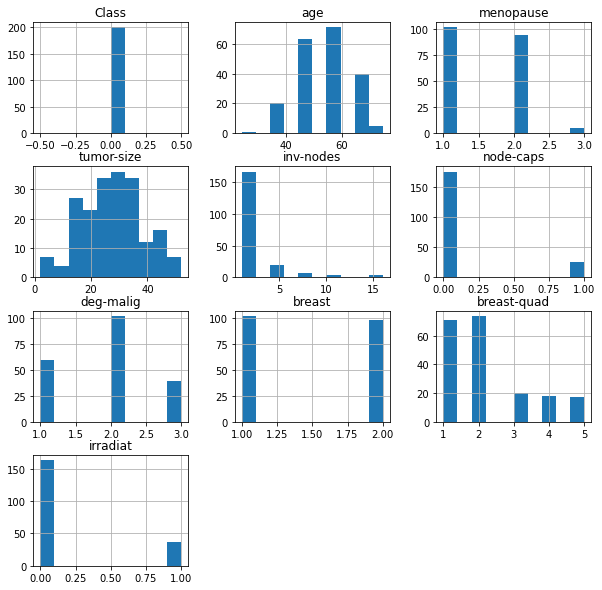

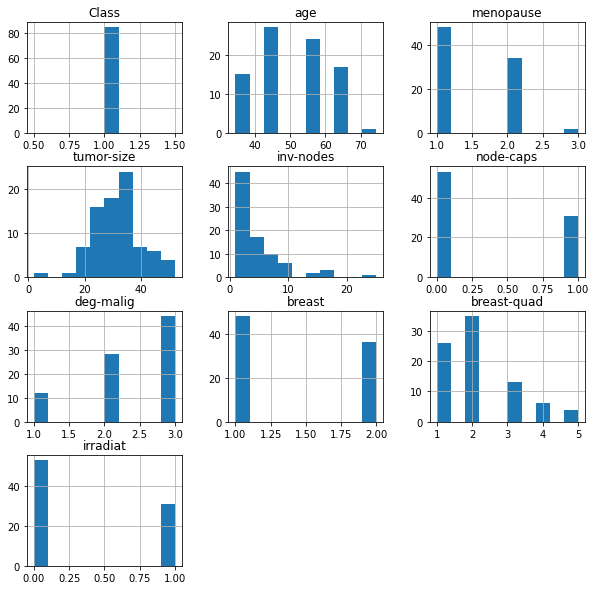

In [11]:
# Grouping by Class attribute and floating with the help of histogram 
CleanData.groupby("Class").hist(figsize=(10,10))


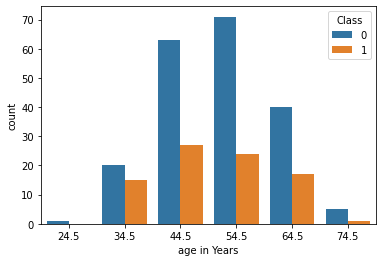

In [12]:
# Class no-recurrence-events = 0 and recurrence-events = 1

ax = sns.countplot(x = 'age',hue = 'Class', data = CleanData)
ax.set(xlabel="age in Years")

# Show Age Vs Class Plot
plt.show()

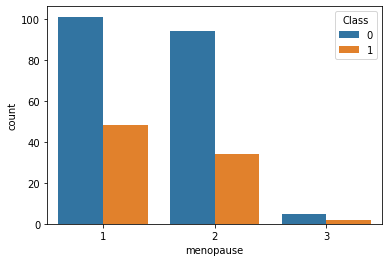

In [13]:
# Class no-recurrence-events = 0 and recurrence-events = 1

sns.countplot(x = 'menopause', hue = 'Class', data = CleanData)

plt.show()

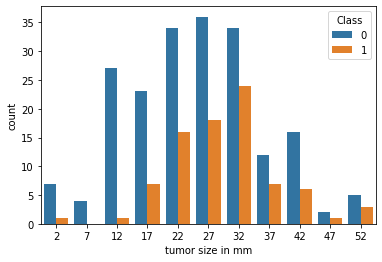

In [14]:
# Class no-recurrence-events = 0 and recurrence-events = 1

ax = sns.countplot(x = 'tumor-size', hue = 'Class', data = CleanData)
ax.set(xlabel="tumor size in mm")

plt.show()

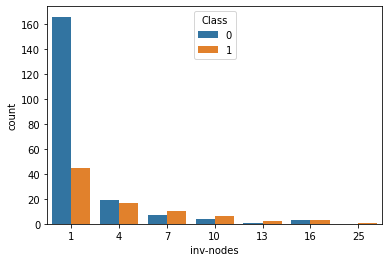

In [15]:
# Class no-recurrence-events = 0 and recurrence-events = 1

sns.countplot(x = 'inv-nodes', hue = 'Class', data = CleanData)

plt.show()

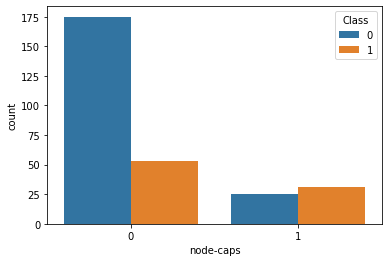

In [16]:
# Class no-recurrence-events = 0 and recurrence-events = 1

sns.countplot(x = 'node-caps', hue = 'Class', data = CleanData)

plt.show()

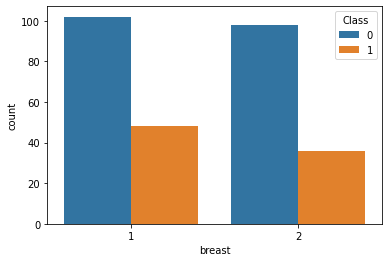

In [17]:
# Class no-recurrence-events = 0 and recurrence-events = 1

sns.countplot(x = 'breast', hue = 'Class', data = CleanData)
plt.show()

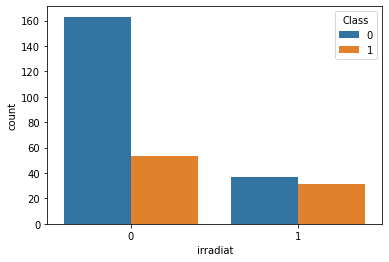

In [18]:
# Class no-recurrence-events = 0 and recurrence-events = 1

sns.countplot(x = 'irradiat', hue = 'Class', data = CleanData)
plt.show()

###  Heirarchy

#  Data Sampling

In [19]:
Output=CleanData['Class']
Output.dtype

dtype('int32')

In [20]:
#Stored few Cancer Characteristics
features_list = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig']

In [21]:
features = CleanData[features_list]


In [22]:
features.head()


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig
0,44.5,1,22,1,0,2
1,44.5,1,22,1,0,2
2,64.5,2,17,1,0,2
3,44.5,1,2,1,0,2
4,64.5,2,17,1,0,2


In [23]:
Output.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

###  Training Vs Test Results

In [24]:
#Verify the features of training & test results
features_train, features_test, Output_train, Output_test = train_test_split(features, Output, test_size = 0.33, random_state = 324)


In [25]:
print("Number instances in features_train dataset: ", features_train.shape)
print("Number instances in Output_train dataset: ", Output_train.shape)
print("Number instances in features_test dataset: ", features_test.shape)
print("Number instances in Output_test dataset: ", Output_test.shape)

Number instances in features_train dataset:  (190, 6)
Number instances in Output_train dataset:  (190,)
Number instances in features_test dataset:  (94, 6)
Number instances in Output_test dataset:  (94,)


SMOTE Technique to address Data Imbalance



In [26]:
sm = SMOTE(random_state=2)
features_train_res, Output_train_res = sm.fit_resample(features_train, Output_train)

In [27]:
print('After OverSampling, the shape of features_X: {}'.format(features_train_res.shape))
print('After OverSampling, the shape of Output_y: {} \n'.format(Output_train_res.shape))

print("After OverSampling, counts of Recurrent Class '1': {}".format(sum(Output_train_res==1)))
print("After OverSampling, counts of Non-Recurrent Class '0': {}".format(sum(Output_train_res==0)))

After OverSampling, the shape of features_X: (274, 6)
After OverSampling, the shape of Output_y: (274,) 

After OverSampling, counts of Recurrent Class '1': 137
After OverSampling, counts of Non-Recurrent Class '0': 137


In [28]:
# Check features of the training and testing sets.

#type(features_train)
features_train.dtypes


age           float64
menopause       int64
tumor-size      int64
inv-nodes       int64
node-caps       int32
deg-malig       int64
dtype: object

##  Custom Sampling